In [1]:
# nuttige Jupyter Notebook Magic
%config IPCompleter.greedy = True
%matplotlib inline

# Business understanding
We willen een voorspelling kunnen doen wat de koers van een aandeel de komende dag gaat doen, zodat we kunnen bepalen of we dit aandeel net voor het sluiten van de beurs willen aanschaffen om het later met winst te kunnen verkopen.

# Data understanding

We kunnen de API van [Yahoo Finance](https://finance.yahoo.com/) gebruiken om de handelsdata van een aandeel te verkrijgen. Hiervoor moeten we eerst de library toevoegen aan onze pythonomgeving. Dit kan niet via de standaardkanalen van Anaconda, maar wel m.b.v. de package installer van python (pip).

![title](img\yfinance.png)

We kunnen nu de libraries van Yahoo Finance in onze eigen python-omgeving importeren.

In [3]:
import yfinance as yf

We gaan het tijdreeksmodel trainen voor de slotkoersen van Apple aan de Dow Jones in de periode van 1 januari 2016 tot 9 maart 2020. Op de website van [Yahoo Finance](finance.yahoo.com) hebben we gevonden dat de korte naam voor het aandeel van Apple `AAPL` is.

In [4]:
apple_koers = yf.download("AAPL", start="2016-01-01", end="2020-03-09")

[*********************100%***********************]  1 of 1 completed


## Data-exploratie
**Onderzoek de data die we hebben over de handel in het aandeel Apple en beschrijf je bevindingen in dit Notebook.**

In [11]:
# Korte beschrijvende statistiek
apple_koers.info()
apple_koers.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1052 entries, 2015-12-31 to 2020-03-06
Data columns (total 6 columns):
Open         1052 non-null float64
High         1052 non-null float64
Low          1052 non-null float64
Close        1052 non-null float64
Adj Close    1052 non-null float64
Volume       1052 non-null int64
dtypes: float64(5), int64(1)
memory usage: 57.5 KB


,Open,High,Low,Close,Adj Close,Volume
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1.052000e+03
mean,169.149316,170.707766,167.739763,169.319297,165.025466,3.227026e+07
std,53.237478,53.897185,52.715169,53.395570,54.946754,1.470662e+07
min,90.000000,91.669998,89.470001,90.339996,85.192909,1.136200e+07
25%,119.327501,120.097498,119.230001,119.922501,114.286377,2.252265e+07
50%,168.995003,170.500000,166.909996,168.740005,163.723068,2.824650e+07
75%,199.199997,200.885006,198.059998,199.470005,197.031784,3.706290e+07
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.333697e+08


In [10]:
apple_koers

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,107.010002,107.029999,104.820000,105.260002,98.129669,40912300
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.213585,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.752419,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,93.878586,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,89.916473,81094400
...,...,...,...,...,...,...
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.809998,85349300
2020-03-03,303.670013,304.000000,285.799988,289.320007,289.320007,79868900
2020-03-04,296.440002,303.399994,293.130005,302.739990,302.739990,54794600


We werken verder met de slotkoersen (koers op een handelsdag bij het sluiten van de beurs) van het aandeel. 

In [22]:
aandeel_slotkoers = apple_koers["Close"]

**Maak een lijngrafiek die de slotkoersen van het aandeel Apple toont**

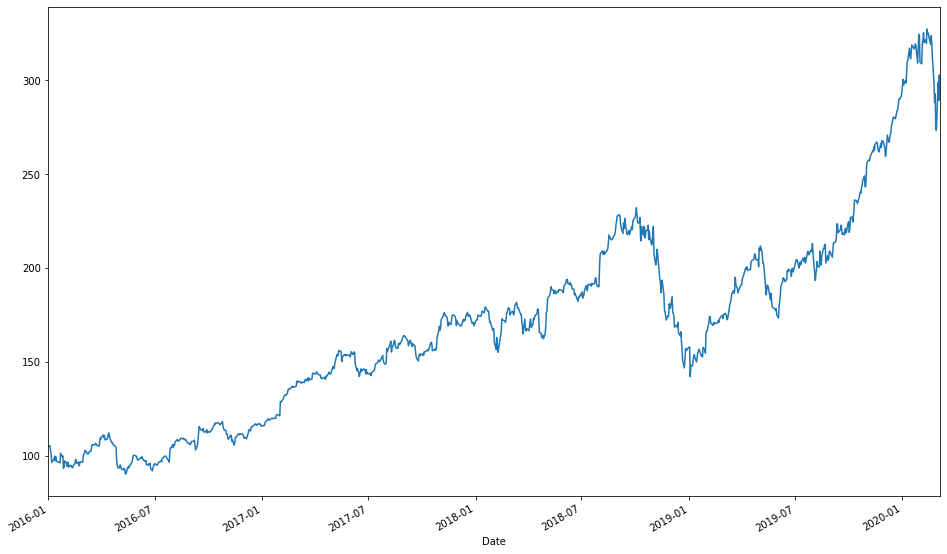

In [23]:
aandeel_slotkoers.plot(figsize=(16,10))

Er zit een stijgende trend in de koers van het Apple aandeel. We hebben in de Datacamp course die we als voorbereiding op deze les gemaakt hebben ['Simple Time Series'](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=11) geleerd dat de data stabiel (stationair) gemaakt moet worden om een tijdreeksmodel te kunnen maken waarbij de Auto Regressie en Moving Average worden gebruikt om voorspellingen te kunnen doen. 

## Datapreparatie
**Prepareer de data als dat nodig is** 

## Data modeling
### Modelkeuze
Het is mogelijk om een tijdreeksmodel te kiezen waarin de data door het model stationair wordt gemaakt. Dit is het **ARIMA**-model. De Integrated (I)-parameter geeft aan welke afgeleide wordt meegenomen om het model stationair te maken. Als we de lijn direct hadden kunnen gebruiken was de I-parameter 0 geweest, dat is in dit geval dus onvoldoende.

We zetten de data om naar de 1e afgeleide en onderzoeken of de data dan wel stabiel is. Dit doe je door te differentiëren.

In [24]:
aandeel_slotkoers_1e_afgeleide = apple_koers["Close"].diff()

**Toon ook de lijngrafiek van de 1e afgeleide van de slotkoersen van het aandeel Apple**

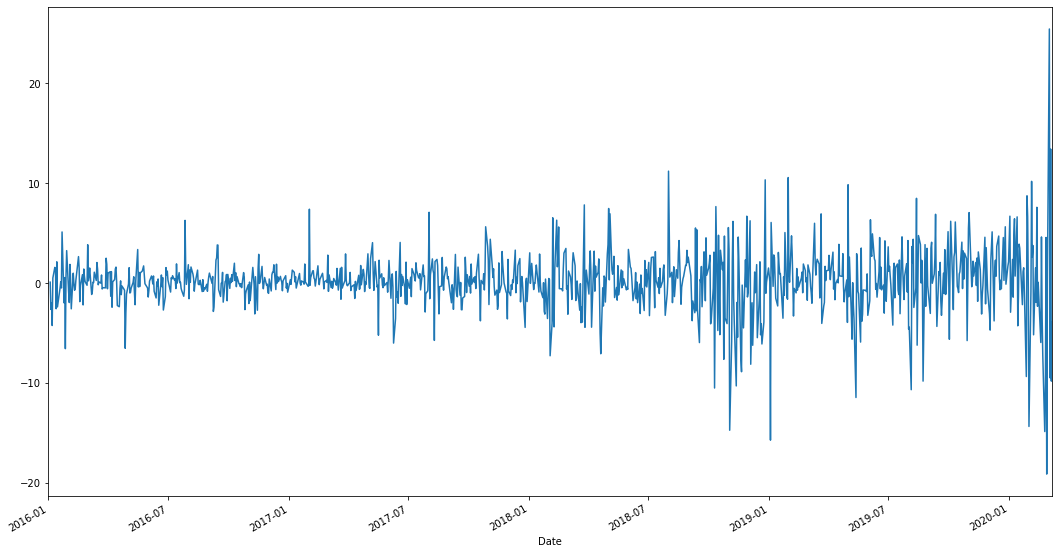

In [25]:
aandeel_slotkoers_1e_afgeleide.plot(figsize=(18,10))

Op het oog kunnen we nu al vaststellen dat de data stabiel (stationair) is. In [een gevorderde cursus](https://campus.datacamp.com/courses/arima-models-in-python/chapter-1-arma-models?ex=5) op Datacamp vinden we dat we de stabiliteit van data ook statistisch kunnen toetsen m.b.v. de Augmented Dicky-Fuller test.  

We voeren deze test eerst uit voor de oorspronkelijke dataset (die in onze ogen niet stabiel was).

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(aandeel_slotkoers.dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.070473
p-value: 0.963986
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Deze test laat zien dat we het goed hadden ingeschat. Het model heeft een p-waarde die ruim boven de waarde van een statistisch significant model (p<0,10) ligt.

In [27]:
result = adfuller(aandeel_slotkoers_1e_afgeleide.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.383009
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Deze test laat zien dat de **1e**-afgeleide van de data wel een statistisch significant stabiel (stationair) is. Als het model nu nog niet voldoende significant was geweest hadden we de tweede en eventueel de derde of vierde afgeleide uitgerekend, maar dat hoeft nu niet..

Conclusie: we kunnen het tijdreeksmodel verder opstellen met de 1e-afgeleide van de aandelendata. 

### Model bouwen
#### Parameters instellen
Bij het opstellen van het ARIMA-model moeten we voor de I-parameter (integrated) de waarde 1 meegeven: `ARIMA(data, order=(?,1,?)).fit()`

We volgen de [Datacamp course](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=13) verder en bepalen de Moving Average (MA) waarde voor het tijdreeksmodel m.b.v. de autocorrelatie. 

*Definities*

Het ACF plot kijkt naar de correlatie van een waarde met vorige lags, maar houdt hierbij een rekening met het feit dat er eerder lags al waren.
Een lag is een vaste tijdsperiode. Afhankelijk van de trends in de data kun je een `lag` instellen op een jaar (bijv. temperatuur in Nederland), een maand (bijv. voor banksaldo van studenten), een week (bijv. aantal verplaatsingen i.v.m. woon-werkverkeer), etc. 

We importeren het package `plot_acf` uit de `statsmodels`-library om een autocorrelatieplot te kunnen maken. 

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

In de koers van het aandeel Apple lijkt geen terugkerend patroon te zitten. Dit betekent dat we geen `lag`-parameter hoeven in te stellen. 

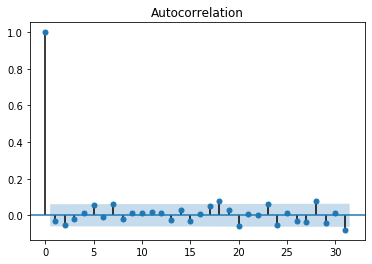

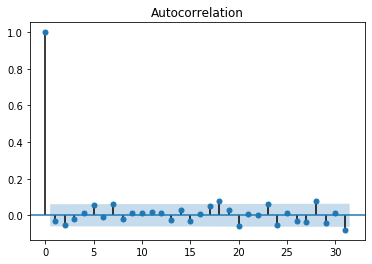

In [29]:
plot_acf(aandeel_slotkoers_1e_afgeleide.dropna())

De auto-correlatiegrafiek wordt twee keer weergegeven. Voor het interpreteren van de grafiek hoeven we hier niets aan te doen. Het toepassen van de methode `gca()` zou het twee keer afbeelden van de grafiek voorkomen.

In dit autocorrelatieplot liggen bijna alle waardes binnen het lichtblauwe onzekerheidsgebied (deze variantie in autocorrelatie kan worden verklaard door ruis). Dit betekent dat we geen MA-parameter hoeven in te stellen. 

Voor de zekerheid bekijken we ook de autocorrelaties met een lag van een jaar.

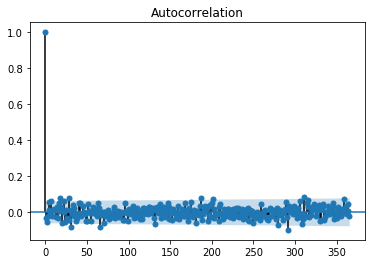

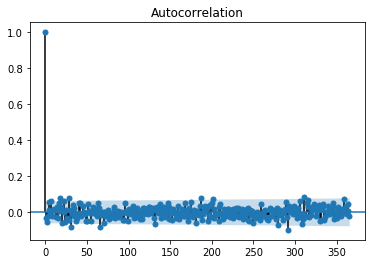

In [30]:
plot_acf(aandeel_slotkoers_1e_afgeleide.dropna(), lags=365)

Beide autocorrelatiegrafieken (zonder lag en met lag van een jaar) lijken erg op elkaar. We hoeven dus geen lag-parameter in te stellen. 

Op de allereerste waarde na ligt de autocorrelatie dicht bij 0. 

Conclusie: de MA-parameter hoeven we voor dit model dus niet in te stellen (dus geven we de waarde 0). De I-waarde was al bekend, nl. 1: `ARIMA(data, order=(?,1,0)).fit()`

Voor het aandeel Apple kan een moving average van 0 als volgt worden uitgelegd: het gewogen gemiddelde van de vorige slotkoersen heeft geen invloed op de huidige slotkoers.

Tenslotte moet nog worden vastgesteld hoeveel ruis er in het model zit en of deze ruis invloed heeft op de variantie van de slotkoersen; dit is de Auto Regressie (`AR`) waarde m.b.v. de partiële autocorrelatie. De partiële autocorrelatie geeft weer hoe sterk het verband is tussen de waarde van een lag en de waarde van voorgaande lags. Als er tussen de lags nog significante correlatie bestaat is dit een aanwijzing dat er auto-correlatie optreed en dat het instellen van de AR parameter een goed idee is. 

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

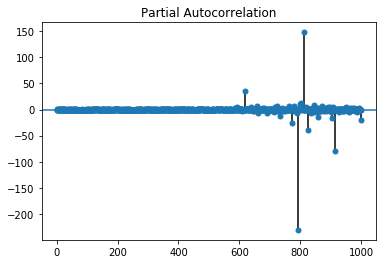

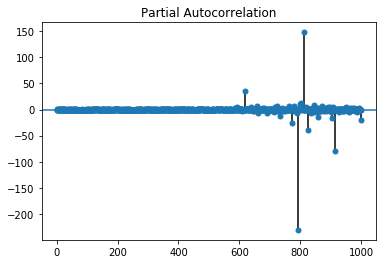

In [60]:
plot_pacf(aandeel_slotkoers_1e_afgeleide.dropna(), lags= 1000)

Veruit de meeste lags hebben een partiële autocorrelatie van dichtbij 0. Rond lag 800 zien we twee uitschieters naar beneden en naar boven. Omdat het nu nog uitzonderingen zijn is dit onvoldoende om een AR-waarde toe te voegen.  De MA en I-waarde waren al bekend, we voegen de AR-waarde 0 toe: `ARIMA(data, order=(0,1,0)).fit()`

Nu we de parameters hebben vastgesteld kunnen we het tijdreeksmodel uitvoeren.

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1051
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2648.449
Method:                           css   S.D. of innovations              3.007
Date:                Wed, 11 Mar 2020   AIC                           5300.898
Time:                        14:00:23   BIC                           5310.813
Sample:                             1   HQIC                          5304.657
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1749      0.093      1.885      0.060      -0.007       0.357


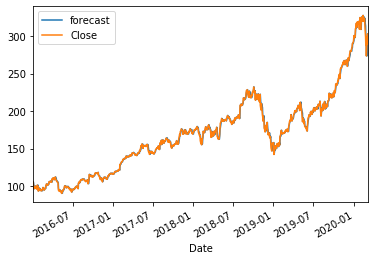

In [44]:
from statsmodels.tsa.arima_model import ARIMA

slotkoers_model = ARIMA(aandeel_slotkoers, order=(0, 1, 0)).fit()
print(slotkoers_model.summary())
fig = slotkoers_model.plot_predict(dynamic=False)

### Model assessment
De p-waarde (P>|z|) gebruiken we om te bepalen of de losse componenten van het getrainde model (AR, I en MA) statistisch significant is. In dit model is de p-waarde <0.1, dit hadden we liever kleiner gezien (dus significanter), maar is voldoende acceptabel. 

*Definitie:* de BIC en AIC waarden zijn maten om te bepalen hoe goed een statistisch model van toepassing is. Het Akaike Information Criterium (AIC) is een criterium dat een compromis maakt tussen de kwaliteit van de fit en de complexiteit van het model. Hoe slechter de fit is, hoe hoger het AIC criterium. 

We beoordelen het door ons gekozen model door de AIC en BIC-waarden de vergelijken met ARIMA-modellen waar de AR en MA parameters wel zijn ingesteld.

**Train het tijdreeksmodel met de AR, I en MA waarden (1,1,0).**

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1051
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2647.896
Method:                       css-mle   S.D. of innovations              3.006
Date:                Wed, 11 Mar 2020   AIC                           5301.792
Time:                        14:08:31   BIC                           5316.664
Sample:                             1   HQIC                          5307.431
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1750      0.090      1.949      0.052      -0.001       0.351
ar.L1.D.Close    -0.0324      0.031     -1.052      0.293      -0.093       0.028
                                    Root

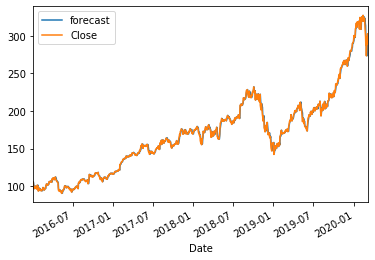

In [48]:
slotkoers_model2 = ARIMA(aandeel_slotkoers, order=(1, 1, 0)).fit()
print(slotkoers_model2.summary())
fig2 = slotkoers_model2.plot_predict(dynamic=False)

**Train het tijdreeksmodel met de AR, I en MA waarden (0,1,1).**

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1051
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2647.831
Method:                       css-mle   S.D. of innovations              3.005
Date:                Wed, 11 Mar 2020   AIC                           5301.661
Time:                        14:08:21   BIC                           5316.534
Sample:                             1   HQIC                          5307.300
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1750      0.089      1.959      0.050    -9.6e-05       0.350
ma.L1.D.Close    -0.0363      0.033     -1.112      0.266      -0.100       0.028
                                    Root

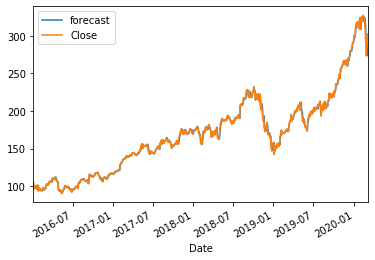

In [47]:
slotkoers_model3 = ARIMA(aandeel_slotkoers, order=(0, 1, 1)).fit()
print(slotkoers_model3.summary())
fig3 = slotkoers_model3.plot_predict(dynamic=False)

**Train het tijdreeksmodel met de AR, I en MA waarden (1,0,1). Interpreteer de foutmelding en neem een passend besluit.**

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1051
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2646.296
Method:                       css-mle   S.D. of innovations              3.001
Date:                Wed, 11 Mar 2020   AIC                           5302.592
Time:                        14:44:18   BIC                           5327.380
Sample:                             1   HQIC                          5311.990
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1759      0.084      2.095      0.036       0.011       0.340
ar.L1.D.Close     0.1557      0.338      0.461      0.645      -0.507       0.818
ar.L2.D.Close    -0.0482      0.034     

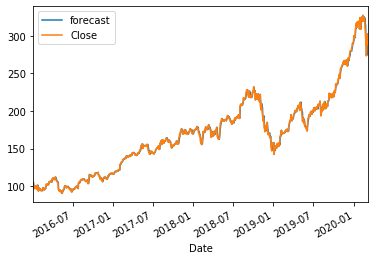

In [65]:
slotkoers_model4 = ARIMA(aandeel_slotkoers.dropna(), order=(2, 1, 1)).fit()
print(slotkoers_model4.summary())
fig4 = slotkoers_model4.plot_predict(dynamic=False)

**Train het tijdreeksmodel met de AR, I en MA waarden (2,1,2).**

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1051
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2645.605
Method:                       css-mle   S.D. of innovations              2.999
Date:                Wed, 11 Mar 2020   AIC                           5303.211
Time:                        14:28:57   BIC                           5332.955
Sample:                             1   HQIC                          5314.488
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1761      0.085      2.077      0.038       0.010       0.342
ar.L1.D.Close    -0.5316      0.267     -1.992      0.047      -1.055      -0.009
ar.L2.D.Close     0.2720      0.240     

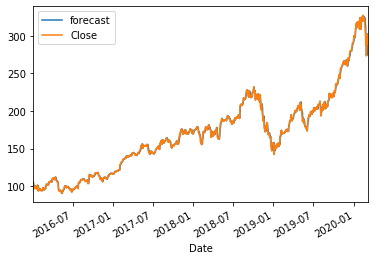

In [55]:
slotkoers_model5 = ARIMA(aandeel_slotkoers, order=(2, 1, 2)).fit()
print(slotkoers_model5.summary())
fig = slotkoers_model5.plot_predict(dynamic=False)

De AIC en BIC-waarden zijn in alle modellen vergelijkbaar. Tussendoor hebben we nog gezien dat het ARIMA-model niet uitgevoerd wordt als de data niet stationair is. 

Conclusie: het door ons gekozen model (zonder AR en MA waarden, maar wel stationair gemaakt) heeft een vergelijkbare afweging tussen fit en complexiteit. In de andere modellen zijn de AR en MA waarden hoog (dus onvoldoende statistisch significant). We kiezen altijd voor het geschiktste model met de laagste complexiteit.

In [61]:
ARIMA(aandeel_slotkoers, order=(1,1,0)).fit().predict()[0]

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0.17497659633042012

## Evaluatie
We kunnen het model nu gebruiken om te voorspellen hoeveel punten de slotkoers de volgende dag hoger of lager ligt.

Deze voorspelling was voor 10 maart 2020. Lag de slotkoers van het aandeel Apple inderdaad 0.17 punten hoger zoals voorspeld? 